___
## MOVIE ANALYSIS PROJECT

## Business Problem  
Your company has observed that major players in the entertainment industry are creating original video content, and they want to enter this space as well. They plan to launch a new movie studio, but currently lack industry insights.

## Objective  
To explore and identify which genres or types of films perform best in terms of box office revenue and audience/critic ratings.

## Project Goal  
To determine the most successful film types based on ratings and revenue, and recommend which genres the new movie studio should focus on producing.

## Approach and Plan

### 1. Import Required Libraries  
- sqlite3 for connecting to and querying the IMDb dataset  
- pandas for data manipulation and analysis  
- matplotlib.pyplot for visualizing patterns and trends  

### 2. Load the Datasets  
- Read the IMDb .sqlite database  
- Read the Box Office Mojo .csv file  
- Display the first and last 5 rows to understand the structure  

### 3. Understand the Data  
Use exploratory methods to understand each dataset:  
- .info() to check data types and non-null counts  
- .describe() for statistical summary  
- .isna().sum() to identify missing values  

### 4. Clean the Data  
- Handle missing and inconsistent values  
- Convert columns to appropriate data types  
- Remove duplicates  
- Standardize formats. 

### 5. Merge the Datasets  
- Identify a common key to join on  
- Merge IMDb and Box Office Mojo data into a single DataFrame  

### 6. Clean the Merged Data  
- Re-check for duplicates, nulls, or type mismatches  
- Create any new relevant columns

### 7. Exploratory Data Analysis (EDA)  
Use visualizations to identify trends and patterns:  
- Top performing genres by revenue and rating  
- Correlation between budget, rating, and revenue  
- Trends over time.  
- Use bar charts, scatter plots, heatmaps, etc.  

### 8. Draw Conclusions  
Summarize key insights:  
- Which genres consistently perform well?  
- What budget levels lead to the highest returns?  

### 9. Provide Recommendations  
Suggest the best genres or film types the company should focus on producing.
__es or film types the company should focus on producing.
nres or film types the company should focus on producing.
nres or film types the company should focus on producing.


In [148]:
#importing the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [149]:
#loading the data sets
#starting with the box office mojo csv file
movie_df= pd.read_csv('bom.movie_gross.csv.gz')
movie_df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [150]:
#previewing the Box office data set
#the first 5 rows
movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [151]:
#the last five
movie_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


movie_df.info()#getting a quick summary of the Box office mojo data.

In [319]:
#.describe()
movie_df.describe()

,domestic_gross,foreign_gross,year
count,3.387000e+03,3.387000e+03,3387.000000
mean,2.850821e+07,4.502979e+07,2013.958075
std,6.675575e+07,1.126843e+08,2.478141
min,0.000000e+00,0.000000e+00,2010.000000
25%,1.115000e+05,0.000000e+00,2012.000000
50%,1.300000e+06,1.500000e+06,2014.000000
75%,2.750000e+07,2.915000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [153]:
movie_df.isna().sum() #checking for missing values and the sum of these missing values.

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

___
## Data Cleaning  
The goal of data cleaning is to make the dataset accurate and consistent for analysis.

### 1. Handling Missing Values  
Identify and handle any null values by either dropping them or filling them using appropriate methods.

### 2. Fixing Data Types  
Convert columns to their correct data types to ensure proper analysis.

### 3. Removing Duplicates  
Drop any repeated rows to prevent skewed results.

### 4. Standardizing Text  
- Convert text to lowercase  
- Remove leading and trailing whitespace  
- Clean text columns 
  for consistency


In [155]:
#filling the missing values
movie_df['studio']= movie_df['studio'].fillna('unknown')
movie_df['domestic_gross']= movie_df['domestic_gross'].fillna(0)
#change the data type of foreign_gross to float
movie_df['foreign_gross']=pd.to_numeric(movie_df['foreign_gross'],errors='coerce')
#filling the missing values in foreign_gross
movie_df['foreign_gross']=movie_df['foreign_gross'].fillna(0)



In [156]:
movie_df.info() #to confirm whether I have worked on all missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [157]:
#checling for duplicates and removing them.
movie_df.duplicated().sum()

0

In [158]:
movie_df['title'].unique()

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [159]:
#removing any whitespace
movie_df['title']=movie_df['title'].str.strip().str.title()

In [160]:
#loading the imdb data set
#connect my imdb data set to the data base
conn= sqlite3.connect('im.db/im.db')


In [161]:
#list all the tables
tables_df=pd.read_sql(
    '''SELECT name
       FROM sqlite_master
       WHERE type='table'
''', conn);
tables_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [162]:
movie_basics= pd.read_sql(
    '''SELECT *
       FROM movie_basics
       
''',conn);
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [163]:
movie_ratings= pd.read_sql(
    '''SELECT*
       FROM movie_ratings
''',conn);
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [164]:
#cleaning my relevant tables; movie ratings and movie basics
movie_basics.info()#starting with movie_basics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [165]:
#identifying null and handling them
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [166]:
movie_basics['original_title']= movie_basics['original_title'].fillna('unknown')
movie_basics= movie_basics.drop(columns=['runtime_minutes']) 
movie_basics['genres']=movie_basics['genres'].fillna('')

In [167]:
#checking for duplicates
movie_basics.duplicated().sum()

0

In [168]:
#standardizing text and removing whitespace
movie_basics['primary_title']=movie_basics['primary_title'].str.lower().str.strip()

                                             


In [169]:
movie_basics['genres'] = movie_basics['genres'].fillna('').astype(str).str.replace('\n', '', regex=True).str.lower().str.strip().str.split(',').apply(lambda x: [g.strip() for g in x])


In [170]:
all_genres = movie_basics['genres'].explode().unique()
all_genres


array(['action', 'crime', 'drama', 'biography', 'comedy', 'fantasy',
       'horror', 'thriller', 'adventure', 'animation', 'documentary',
       'history', '', 'mystery', 'sci-fi', 'romance', 'family', 'war',
       'music', 'sport', 'western', 'musical', 'adult', 'news',
       'talk-show', 'reality-tv', 'game-show', 'short'], dtype=object)

In [321]:
#doing the same for movie_ratings.
#checking my data types and whether there are null values
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [172]:
#checking for null
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [173]:
#checking for duplicates
movie_ratings.duplicated().sum()

0

In [174]:
#merging my two relevant sql tables. Since I loaded the data in pandas the syntax changes from join to merge.The common key between them is movie id.
merged_sql= pd.merge(movie_basics, movie_ratings, on='movie_id',how='inner')

In [175]:
merged_sql #viewing my merge

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,sunghursh,Sunghursh,2013,"[action, crime, drama]",7.0,77
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,"[biography, drama]",7.2,43
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,[drama],6.9,4517
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,"[comedy, drama]",6.1,13
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,"[comedy, drama, fantasy]",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,diabolik sono io,Diabolik sono io,2019,[documentary],6.2,6
73852,tt9914286,sokagin çocuklari,Sokagin Çocuklari,2019,"[drama, family]",8.7,136
73853,tt9914642,albatross,Albatross,2017,[documentary],8.5,8
73854,tt9914942,la vida sense la sara amat,La vida sense la Sara Amat,2019,[],6.6,5


In [176]:
merged_sql['original_tile']= merged_sql['original_title'].str.title().str.strip()

In [177]:
# Check overlap with primary_title
print("Matches with primary_title:",
      merged_sql['primary_title'].isin(movie_df['title']).sum())

# Check overlap with original_title
print("Matches with original_title:",
      merged_sql['original_title'].isin(movie_df['title']).sum())


Matches with primary_title: 7
Matches with original_title: 1993


___
**Merging the two datasets**  
<br>  
The common key between the two data sets is title but they are named differently, therefore I need to rename them.  
<br>  
Merging the two data sets for analysis so as to help the head of the company identify what type of films to create.  
<br>
<br>

___

In [179]:
#renaming the merged_sql original_title to title
merged_sql.rename(columns={'original_title': 'title'}, inplace=True)
#merging the two
merged_df=pd.merge(merged_sql,movie_df, on='title', how='inner')


In [180]:
merged_df

,movie_id,primary_title,title,start_year,genres,averagerating,numvotes,original_tile,studio,domestic_gross,foreign_gross,year
0,tt0315642,wazir,Wazir,2016,"[action, crime, drama]",7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016
1,tt0369610,jurassic world,Jurassic World,2015,"[action, adventure, sci-fi]",7.0,539338,Jurassic World,Uni.,652300000.0,0.0,2015
2,tt0372538,spy,Spy,2011,"[action, crime, drama]",6.6,78,Spy,Fox,110800000.0,124800000.0,2015
3,tt3079380,spy,Spy,2015,"[action, comedy, crime]",7.0,213908,Spy,Fox,110800000.0,124800000.0,2015
4,tt0376136,the rum diary,The Rum Diary,2011,"[comedy, drama]",6.2,94787,The Rum Diary,FD,13100000.0,10800000.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
1988,tt7948540,ya veremos,Ya Veremos,2018,[drama],5.5,505,Ya Veremos,PNT,4200000.0,0.0,2018
1989,tt8011712,the past,The Past,2018,"[drama, horror]",7.4,54,The Past,SPC,1300000.0,9300000.0,2013
1990,tt8108198,andhadhun,Andhadhun,2018,"[crime, thriller]",8.5,43409,Andhadhun,Eros,1200000.0,0.0,2018
1991,tt8427036,helicopter eela,Helicopter Eela,2018,[drama],5.4,673,Helicopter Eela,Eros,72000.0,0.0,2018


**Cleaning the merged dataframe**

In [182]:
#.info()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        1993 non-null   object 
 1   primary_title   1993 non-null   object 
 2   title           1993 non-null   object 
 3   start_year      1993 non-null   int64  
 4   genres          1993 non-null   object 
 5   averagerating   1993 non-null   float64
 6   numvotes        1993 non-null   int64  
 7   original_tile   1993 non-null   object 
 8   studio          1993 non-null   object 
 9   domestic_gross  1993 non-null   float64
 10  foreign_gross   1993 non-null   float64
 11  year            1993 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 187.0+ KB


In [183]:
#dropping duplicate columns.
merged_df.drop(columns=['primary_title','original_tile'], inplace=True)

In [221]:
merged_df['title']

0                  Wazir
1         Jurassic World
2                    Spy
3                    Spy
4          The Rum Diary
              ...       
1988          Ya Veremos
1989            The Past
1990           Andhadhun
1991     Helicopter Eela
1992    Oolong Courtyard
Name: title, Length: 1993, dtype: object

In [227]:
merged_df.isna().sum() #confirming that indeed there are no nulls.


movie_id          0
title             0
start_year        0
genres            0
averagerating     0
numvotes          0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [250]:
merged_df= merged_df.explode('genres')#since each movie as different genres.

In [254]:
#confirming
merged_df['genres'].head()

0       action
0        crime
0        drama
1       action
1    adventure
Name: genres, dtype: object

___
### Visualizations

Visualizations were used to identify trends and patterns, helping to draw meaningful conclusions.

Since the goal of this analysis is to determine which types of films perform well in terms of **ratings** and **revenue**, using the IMDB and BOM datasets, the following visualizations were created:

1. **Average Revenue by Genre**  
   To identify which genres generate the highest returns.

2. **Average Rating by Genre**  
   To determine which genres are most favored by audiences.

3. **Rating vs Revenue**  
   To examine the relationship between audience ratings and box office earnings.

4. **Year vs Rating**  
   To observe how movie ratings have evolved over time.

5. **Foreign Gross vs Genre**  
   To explore how different genres perform in international markets.

___

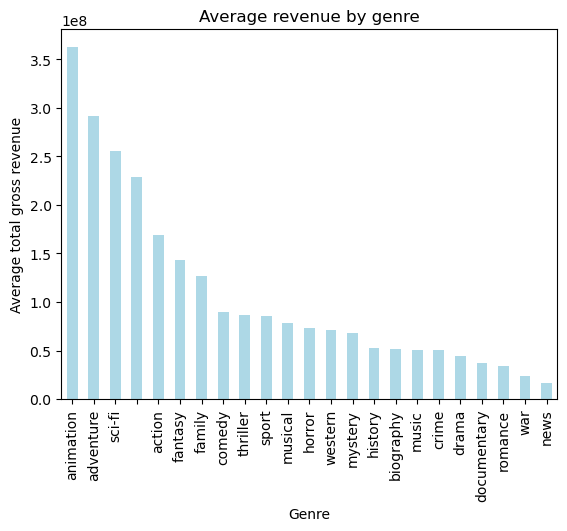

In [264]:
#average revenue by genre.
# Does a particular genre have better returns?
#creating another column called total_gross since we have both domestic and foreign gross.
merged_df['total_gross']= merged_df['domestic_gross'] + merged_df['foreign_gross']

#plotting average gross by revenue using matplotlib.
average_gross= merged_df.groupby('genres')['total_gross'].mean().sort_values(ascending=False)
average_gross.plot(kind='bar', color='lightblue')
plt.title('Average revenue by genre')
plt.xlabel('Genre')
plt.ylabel('Average total gross revenue')
plt.xticks(rotation=90)
plt.show()


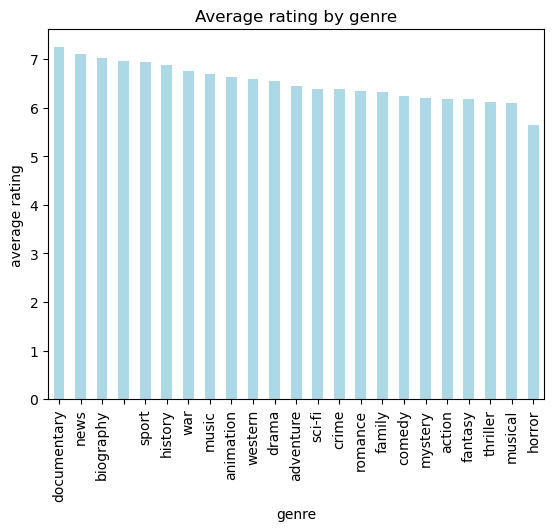

In [270]:
#average rating by genre
#Which genre has the highest average rating?
average_rating=merged_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
average_rating.plot(kind='bar',color='lightblue')
plt.title('Average rating by genre')
plt.xlabel('genre')
plt.ylabel('average rating')
plt.xticks(rotation=90)
plt.show()

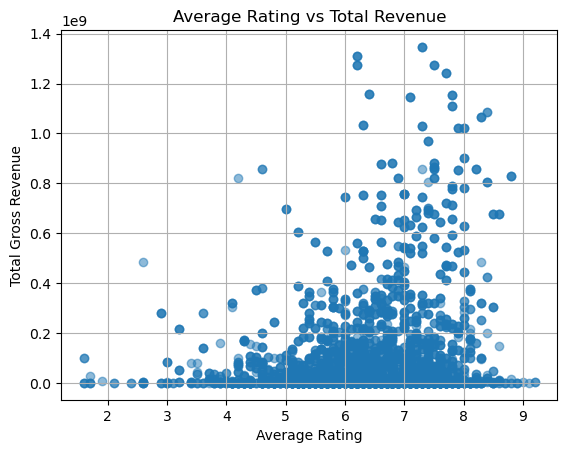

In [276]:
#rating vs revenue
#Do high ratings result in high revenue?
plt.scatter(merged_df['averagerating'], merged_df['total_gross'],alpha=0.5)
plt.title('Average Rating vs Total Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Revenue')
plt.grid()
plt.show()

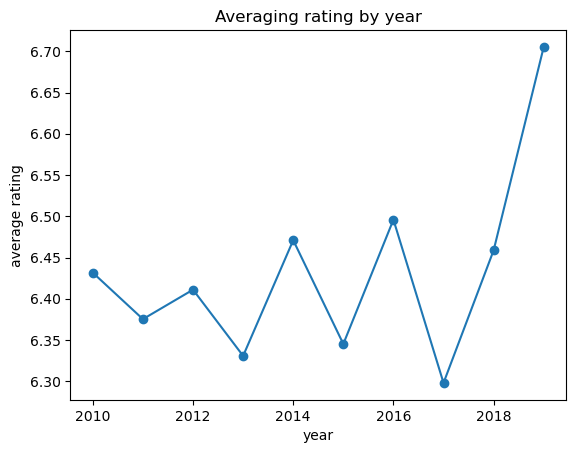

In [282]:
#year vs rating
#Which year had the highest rating?
rating_by_year=merged_df.groupby('start_year')['averagerating'].mean()
rating_by_year.plot(kind='line',marker='o')
plt.title('Averaging rating by year')
plt.xlabel('year')
plt.ylabel('average rating')
plt.show()

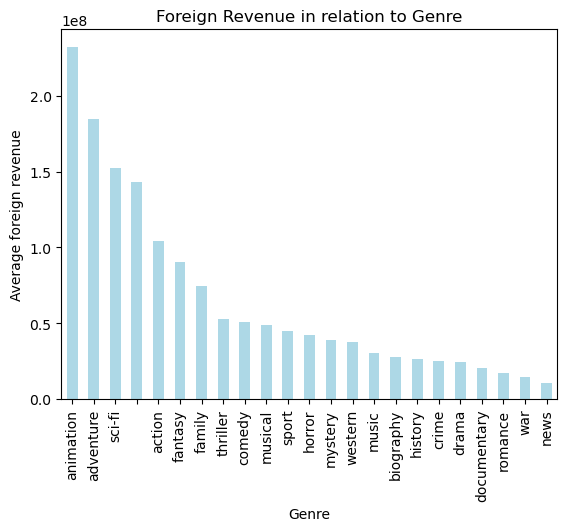

In [288]:
#foreign gross vs genre
#which genre is more favourable internationally?
average_foreign_gross= merged_df. groupby('genres')['foreign_gross'].mean().sort_values(ascending=False)
average_foreign_gross.plot(kind='bar', color='lightblue')
plt.title('Foreign Revenue in relation to Genre')
plt.xlabel('Genre')
plt.ylabel('Average foreign revenue')
plt.xticks(rotation=90)
plt.show()

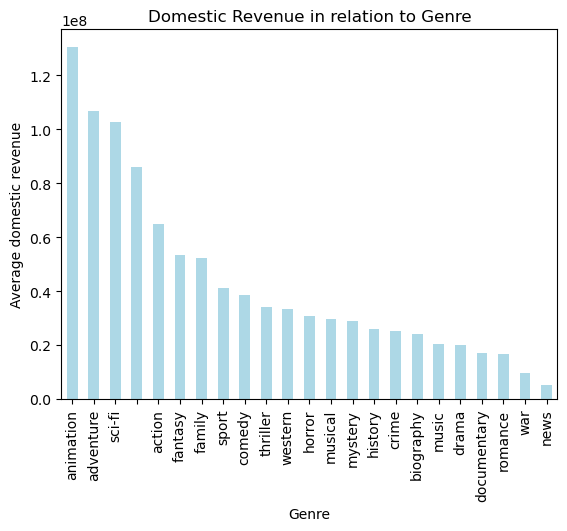

In [292]:
#domestic gross vs genre
#Which genre does well domestically?
average_domestic_gross= merged_df.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)
average_domestic_gross.plot(kind='bar', color='lightblue')
plt.title('Domestic Revenue in relation to Genre')
plt.xlabel('Genre')
plt.ylabel('Average domestic revenue')
plt.xticks(rotation=90)
plt.show()

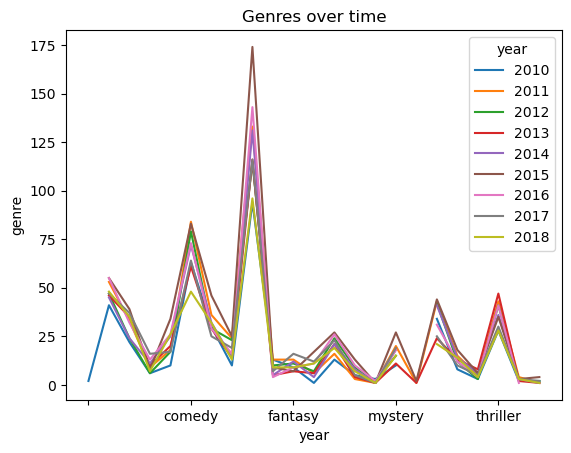

In [302]:
#genres over time
#how have different genres evolved over the years?
genre_by_year= merged_df.groupby(['genres','year']).size().unstack()
genre_by_year.plot(kind='line')
plt.title('Genres over time')
plt.xlabel('year')
plt.ylabel('genre')
plt.show()


___
### Conclusions

Based on the analysis of the IMDB and BOM datasets, it is evident that:

1. **Animation, Sci-Fi, and Adventure** genres yield the **highest returns**, while **News, War, and Romance** genres have the **least returns**.
2. **Documentaries, News, and Biographies** tend to receive the **highest ratings**, whereas **Musicals and Horror** films have the **lowest average ratings**.
3. **Highly rated movies do not always generate high revenue**, indicating that audience acclaim doesn't always


___
### Recommendations

1. **Invest in Animation and Sci-Fi genres**  
   These genres consistently deliver high returns both domestically and internationally, making them a strategic focus for future production and marketing efforts.

2. **Avoid heavy investment in News and War films**  
   These genres tend to underperform in terms of both revenue and viewer ratings, suggesting lower audience appeal and financial risk.

3. **Do not assume high ratings guarantee high revenue**  
   The analysis shows that critically acclaimed films (high ratings) do not always translate to box office success. Strategic marketing and genre appeal are also key.

4. **Prioritize Documentaries and Biographies for critical acclaim**  
   While they may not always generate the highest revenue, they tend to receive strong ratings, offering value for prestige, awards, or niche audience engagement.

5. **Expand Animation for international markets**  
   Animation performs particularly well internationally. Studios should consider scaling up animation content targeting global audiences.

6. **Leverage the steady rise in ratings since 2017**  
   The upward trend in average ratings may indicate improving film quality or shifting audience preferences. Understanding and sustaining this trend can help maintain competitive advantage.

___